<a href="https://colab.research.google.com/github/pioneer123456/Smart-ML-based-Refrigerator/blob/main/Project_Smart_Refrigerator_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
%load_ext tensorboard
 
# Helper libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime
 
print(tf.__version__)

2.8.0


In [3]:
from numpy.random import seed
seed(1)

In [4]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [5]:
!git clone https://github.com/pioneer123456/Smart-ML-based-Refrigerator.git

Cloning into 'Smart-ML-based-Refrigerator'...
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 137 (delta 11), reused 123 (delta 6), pack-reused 0
Receiving objects: 100% (137/137), 17.83 MiB | 23.65 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [6]:
!cp -r Smart-ML-based-Refrigerator/Data /content/fruit_data/

In [7]:
# accessing the given csv file
import pandas as pd
train_labels_csv = pd.read_csv('/content/fruit_data/train_data.csv')
test_labels_csv = pd.read_csv('/content/fruit_data/test_data.csv')
test_labels_csv.head()   # this file contains file name and corresponding labels

,filename,label
0,Image_1.jpg,looks_good
1,Image_2.jpg,looks_good
2,Image_3.jpg,looks_good
3,Image_4.jpg,looks_good
4,Image_5.jpg,looks_good


In [78]:
test_labels_csv.columns = ['filename','labe']
test_labels_csv.head()   

,filename,labe
0,Image_1.jpg,looks_good
1,Image_2.jpg,looks_good
2,Image_3.jpg,looks_good
3,Image_4.jpg,looks_good
4,Image_5.jpg,looks_good


In [79]:
# getting the path of all image files
train_image_paths = [[fname, '/content/fruit_data/Train_data/' + fname[:-4] + '.jpg'] for fname in train_labels_csv['filename']]
test_image_paths= [[fname, '/content/fruit_data/Test_data/' + fname[:-4] + '.jpg'] for fname in test_labels_csv['filename']]
train_image_paths

[['Image_1.jpg', '/content/fruit_data/Train_data/Image_1.jpg'],
 ['Image_2.jpg', '/content/fruit_data/Train_data/Image_2.jpg'],
 ['Image_3.jpg', '/content/fruit_data/Train_data/Image_3.jpg'],
 ['Image_4.jpg', '/content/fruit_data/Train_data/Image_4.jpg'],
 ['Image_5.jpg', '/content/fruit_data/Train_data/Image_5.jpg'],
 ['Image_6.jpg', '/content/fruit_data/Train_data/Image_6.jpg'],
 ['Image_7.jpg', '/content/fruit_data/Train_data/Image_7.jpg'],
 ['Image_8.jpg', '/content/fruit_data/Train_data/Image_8.jpg'],
 ['Image_9.jpg', '/content/fruit_data/Train_data/Image_9.jpg'],
 ['Image_10.jpg', '/content/fruit_data/Train_data/Image_10.jpg'],
 ['Image_11.jpg', '/content/fruit_data/Train_data/Image_11.jpg'],
 ['Image_12.jpg', '/content/fruit_data/Train_data/Image_12.jpg'],
 ['Image_13.jpg', '/content/fruit_data/Train_data/Image_13.jpg'],
 ['Image_14.jpg', '/content/fruit_data/Train_data/Image_14.jpg'],
 ['Image_15.jpg', '/content/fruit_data/Train_data/Image_15.jpg'],
 ['Image_16.jpg', '/content/

In [51]:
#Creating a DataFrame for image names and image paths
train_images = pd.DataFrame(train_image_paths)
train_images.columns = ['filename', 'file']
train_images

,filename,file
0,Image_1.jpg,/content/fruit_data/Train_data/Image_1.jpg
1,Image_2.jpg,/content/fruit_data/Train_data/Image_2.jpg
2,Image_3.jpg,/content/fruit_data/Train_data/Image_3.jpg
3,Image_4.jpg,/content/fruit_data/Train_data/Image_4.jpg
4,Image_5.jpg,/content/fruit_data/Train_data/Image_5.jpg
...,...,...
75,Image_76.jpg,/content/fruit_data/Train_data/Image_76.jpg
76,Image_77.jpg,/content/fruit_data/Train_data/Image_77.jpg
77,Image_78.jpg,/content/fruit_data/Train_data/Image_78.jpg
78,Image_79.jpg,/content/fruit_data/Train_data/Image_79.jpg


In [80]:
#Creating a dataframe for to access test images
testt_images = pd.DataFrame(test_image_paths)
testt_images.columns = ['filename', 'file']
testt_images.head()

,filename,file
0,Image_1.jpg,/content/fruit_data/Test_data/Image_1.jpg
1,Image_2.jpg,/content/fruit_data/Test_data/Image_2.jpg
2,Image_3.jpg,/content/fruit_data/Test_data/Image_3.jpg
3,Image_4.jpg,/content/fruit_data/Test_data/Image_4.jpg
4,Image_5.jpg,/content/fruit_data/Test_data/Image_5.jpg


In [53]:
train_data = pd.merge(train_images, train_labels_csv, how = 'inner', on = 'filename')

for i in range(79):
  if train_data.iloc[i,2] !=train_data.iloc[i+1,2]:
    print(train_data.iloc[i,2],train_data.iloc[i+1,2])
train_data.head()

looks_good looks_defected


,filename,file,label
0,Image_1.jpg,/content/fruit_data/Train_data/Image_1.jpg,looks_good
1,Image_2.jpg,/content/fruit_data/Train_data/Image_2.jpg,looks_good
2,Image_3.jpg,/content/fruit_data/Train_data/Image_3.jpg,looks_good
3,Image_4.jpg,/content/fruit_data/Train_data/Image_4.jpg,looks_good
4,Image_5.jpg,/content/fruit_data/Train_data/Image_5.jpg,looks_good


In [54]:
#creating a class to get indices.
class_names = ['looks_good', 'looks_defected']

In [55]:
import cv2

In [56]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os

In [63]:
#preparing data for training
data = []
lbel=[]
IMG_SIZE=244
for i in range(79):
  # read the file using OpenCV's imread function and store it in a variable 'img_array'
  img=cv2.imread(train_data.iloc[i,1],0)
  img = cv2.resize(img,(IMG_SIZE,IMG_SIZE)) #resize the image
  data.append(np.array(img))
  lbel.append(class_names.index(train_data.iloc[i,2])) #  append the image array and the label of each file into data


In [81]:
#preparing data for evaluation
y_data=[]
y_lbel=[]
for j in range(60,79):
  # read the file using OpenCV's imread function and store it in a variable 'img_array'
  img=cv2.imread(train_data.iloc[j,1],0)
  img = cv2.resize(img,(IMG_SIZE,IMG_SIZE)) #resize the image
  y_data.append(np.array(img))
  y_lbel.append(class_names.index(train_data.iloc[j,2])) #  append the image array and the label of each file into data


In [82]:
#preparing final testing data
tdata = []
IMG_SIZE=244
for i in range(len(testt_images)):
  # read the file using OpenCV's imread function and store it in a variable 'img_array'
   img=cv2.imread(testt_images.iloc[i,1],0)
   if type(img) is np.ndarray:
        
        if img.size == 0:
          
          continue
        if img is None:
          print("1")
          continue
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE)) #resize the image
        tdata.append(np.array(img)) #  append the image array and the label of each file into datadimensio

In [65]:
lbel=np.array(lbel)
type(lbel)
lbel.shape

(79,)

In [83]:
tdata[0].shape


(244, 244)

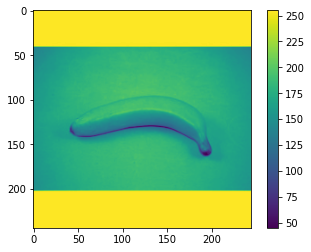

In [67]:

#check the range of pixel values
plt.figure()

plt.imshow(data[9])

plt.colorbar()
plt.grid(False)
plt.show()


In [84]:
data=np.array(data)
y_data=np.array(y_data)
data=data/255.0
y_data=y_data/255.0
data[1]
y_data.shape

(19, 244, 244)

In [85]:
tdata=np.array(tdata)
tdata=tdata/255.0

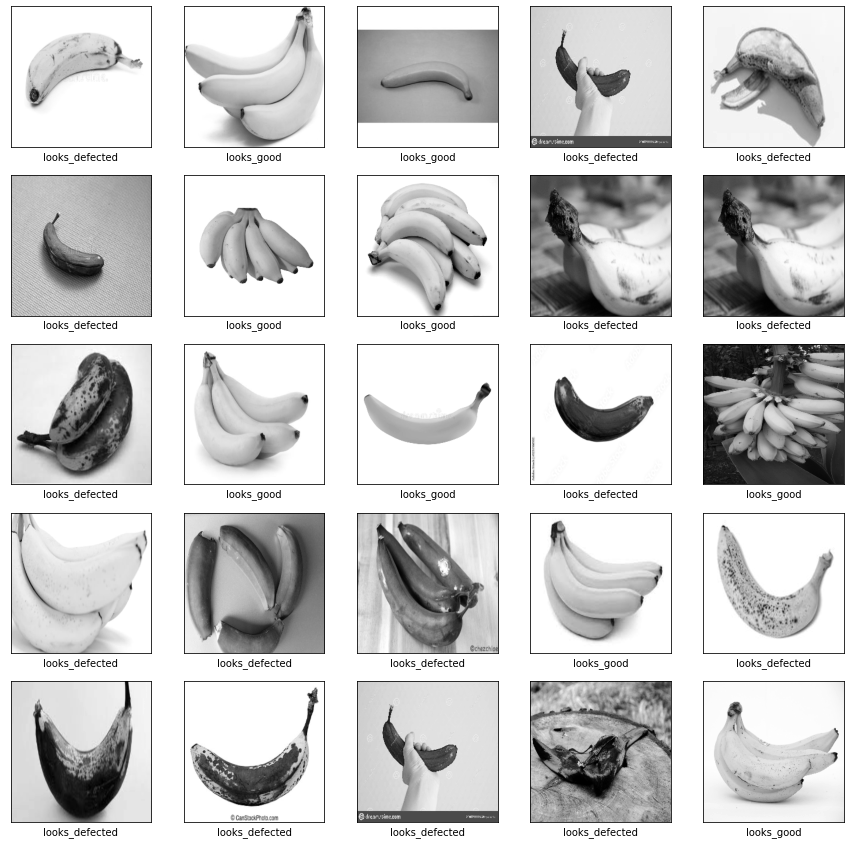

In [70]:
#Lets visulaize training data
plt.figure(figsize=(15,15))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  rand_no = random.randint(0,79)     
  plt.imshow(data[rand_no], cmap='gray')
  plt.xlabel(class_names[lbel[rand_no]])

In [71]:
# Clear any logs from previous runs
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(224,224)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))


In [72]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.001)    # 0.001 is the learning rate

In [73]:
def create_model():
  model=Sequential()
  #input layer size is 244*244 after flattening
  model.add(Flatten(input_shape=(244,244)))
  #hidden layer with 400 neurons
  model.add(Dense(512,activation='relu'))
  model.add(Dense(2,activation='sigmoid'))
  return model

In [74]:
opt = SGD(lr=0.01, momentum=0.9)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [75]:
model=create_model()
model.summary()
model.compile(optimizer=opt,
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)
earlystopping_callback=EarlyStopping(
    monitor='val_loss',min_delta=0,patience=3,verbose=0,mode='auto',
    baseline=None,restore_best_weights=True
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 59536)             0         
                                                                 
 dense_3 (Dense)             (None, 512)               30482944  
                                                                 
 dense_4 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 30,483,970
Trainable params: 30,483,970
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.fit(
    x=data,
    y=lbel,
    epochs=10,
    validation_split=0.0
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 1s 127ms/step - loss: 11.6569 - accuracy: 0.5443
Epoch 2/10
3/3 [==============================] - 0s 107ms/step - loss: 0.7794 - accuracy: 0.5949
Epoch 3/10
3/3 [==============================] - 0s 113ms/step - loss: 0.9576 - accuracy: 0.5063
Epoch 4/10
3/3 [==============================] - 0s 116ms/step - loss: 1.2213 - accuracy: 0.4557
Epoch 5/10
3/3 [==============================] - 0s 112ms/step - loss: 0.6909 - accuracy: 0.5063
Epoch 6/10
3/3 [==============================] - 0s 109ms/step - loss: 0.7840 - accuracy: 0.5063
Epoch 7/10
3/3 [==============================] - 0s 116ms/step - loss: 0.6881 - accuracy: 0.5443
Epoch 8/10
3/3 [==============================] - 0s 109ms/step - loss: 0.7031 - accuracy: 0.5063
Epoch 9/10
3/3 [==============================] - 0s 108ms/step - loss: 0.6749 - accuracy: 0.6709
Epoch 10/10
3/3 [==============================] - 0s 112ms/step - loss: 0.6625 - accuracy: 0.5063


In [86]:
y_lbel=np.array(y_lbel)

In [87]:
x=model.predict(tdata)

In [88]:
x

array([[0.5698287 , 0.41327596],
       [0.5861038 , 0.45375568],
       [0.5774683 , 0.52999383],
       [0.5726537 , 0.52563584],
       [0.545529  , 0.48230803],
       [0.5750839 , 0.46889216],
       [0.57922804, 0.4178859 ],
       [0.5666695 , 0.46674234],
       [0.5938579 , 0.37871543],
       [0.5688164 , 0.47670892],
       [0.5391374 , 0.56089056],
       [0.54612017, 0.5666684 ],
       [0.5471007 , 0.542585  ],
       [0.53104234, 0.5571032 ],
       [0.52434146, 0.46599817],
       [0.5382038 , 0.5274128 ],
       [0.528248  , 0.5868577 ],
       [0.51597816, 0.5597415 ],
       [0.54527134, 0.566555  ],
       [0.53577226, 0.5973963 ]], dtype=float32)

In [89]:
test_loss, test_acc = model.evaluate(y_data,  y_lbel, verbose=2)

1/1 - 0s - loss: 0.7282 - accuracy: 0.5263 - 320ms/epoch - 320ms/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


In [90]:
np.argmax(x[2])

0

In [92]:
class_names[np.argmax(x[9])]

'looks_good'

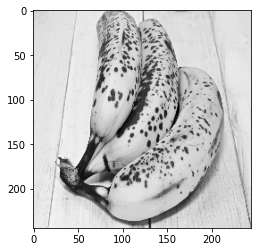

In [93]:
plt.imshow(tdata[9],cmap='gray')

In [94]:
p=[]
for i in range(19):
  p.append(class_names[np.argmax(x[i])])

In [95]:
print(p)

['looks_good', 'looks_good', 'looks_good', 'looks_good', 'looks_good', 'looks_good', 'looks_good', 'looks_good', 'looks_good', 'looks_good', 'looks_defected', 'looks_defected', 'looks_good', 'looks_defected', 'looks_good', 'looks_good', 'looks_defected', 'looks_defected', 'looks_defected']


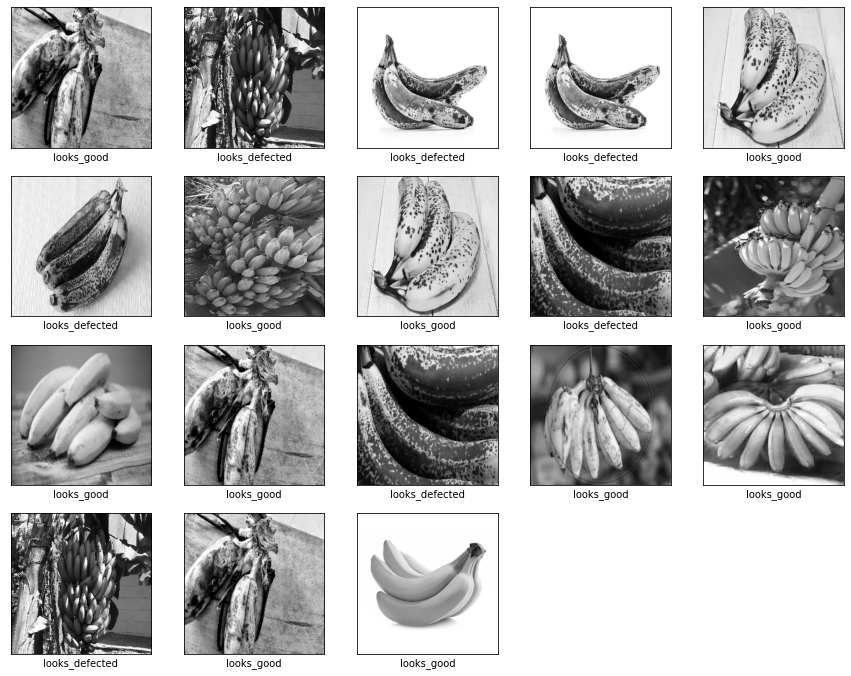

In [98]:
plt.figure(figsize=(15,15))
for i in range(18):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  rand_no = random.randint(0,len(testt_images)-2)     
  plt.imshow(tdata[rand_no], cmap='gray')
  plt.xlabel(class_names[np.argmax(x[rand_no])])

In [100]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import accuracy_score

In [101]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

In [102]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [103]:
KERAS_MODEL_NAME = "rpii.h5"

In [104]:
model.save(KERAS_MODEL_NAME)

In [105]:
convert_bytes(get_file_size(KERAS_MODEL_NAME), "MB")

File size: 232.599 Megabytes


In [107]:
test_loss, test_acc = model.evaluate(y_data,  y_lbel, verbose=2)
print('\nTest accuracy:', test_acc)

1/1 - 0s - loss: 0.7282 - accuracy: 0.5263 - 45ms/epoch - 45ms/step

Test accuracy: 0.5263158082962036


TF Lite Model

In [108]:
TF_LITE_MODEL_FILE_NAME = "modi_rpi.tflite"

In [109]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpu9cpzzd3/assets


In [110]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

121937644

In [111]:
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")

File size: 119079.73 Kilobytes


Check Input Tensor Shape

In [113]:
interpreter = tf.lite.Interpreter(model_path = '/content/modi_rpi.tflite')
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [  1 244 244]
Input Type: <class 'numpy.float32'>
Output Shape: [1 2]
Output Type: <class 'numpy.float32'>
